# Milestone P4 : Creative Extension

## Libraries

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import math
import matplotlib.image as mpimg
%matplotlib inline

## The data

In [3]:
DATA_FOLDER = 'data/'

GOWALLA_CHECKINS_DATASET = DATA_FOLDER+"G_loc_country.csv"
BRIGHTKITE_CHECKINS_DATASET = DATA_FOLDER+"B_loc_country.csv"
POPULATION_DATASET = DATA_FOLDER+"pop_per_country.csv"
BRIGHTKITE_HOME_LOCATIONS = DATA_FOLDER+"new_home_loc_B_country.csv"
GOWALLA_HOME_LOCATIONS = DATA_FOLDER+"new_home_loc_G_country.csv"
COUNTRY_CODES = DATA_FOLDER+"countrycodes.csv"

gowalla_checkins = pd.read_csv(GOWALLA_CHECKINS_DATASET, delimiter = ',', usecols = [1,2,3,4,5])
brightkite_checkins = pd.read_csv(BRIGHTKITE_CHECKINS_DATASET, delimiter = ',', usecols = [1,2,3,4,5])
population = pd.read_csv(POPULATION_DATASET, index_col = 0, names = ['country', 'population'], header = 0)
brightkite_home_locations = pd.read_csv(BRIGHTKITE_HOME_LOCATIONS, sep =',')
gowalla_home_locations = pd.read_csv(GOWALLA_HOME_LOCATIONS, sep =',')
country_codes = pd.read_csv(COUNTRY_CODES, sep =',')

## Cleaning the data

In [4]:
population.sort_values(by = ['population'], ascending = False).head(10)

,country,population
24,china,1313973713
51,india,1095351995
127,united states,298444215
52,indonesia,245452739
15,brazil,188078227
93,pakistan,165803560
9,bangladesh,147365352
101,russia,142893540
91,nigeria,131859731
59,japan,127463611


In [5]:
brightkite_home_locations.head(3)

,user,lat,lon,country
0,0,39.747913,-104.968944,US
1,1,37.599899,-122.372723,US
2,2,39.738874,-104.954143,US


In [6]:
gowalla_home_locations.head(3)

,user,lat,lon,country
0,0,30.259167,-97.750223,US
1,1,50.381005,3.430710,FR
2,2,34.052243,-118.327641,US


In [7]:
country_codes.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [8]:
gowalla_home_locations = pd.merge(gowalla_home_locations, country_codes, left_on = 'country', right_on = 'Code', how = 'left')
gowalla_home_locations.drop(columns = ['country', 'Code'], inplace = True)
gowalla_home_locations.rename(columns = {'Name':'country'}, inplace = True)

brightkite_home_locations = pd.merge(brightkite_home_locations, country_codes, left_on = 'country', right_on = 'Code', how = 'left')
brightkite_home_locations.drop(columns = ['country', 'Code'], inplace = True)
brightkite_home_locations.rename(columns = {'Name':'country'}, inplace = True)

In [9]:
gowalla_checkins = pd.merge(gowalla_checkins, country_codes, left_on = 'country', right_on = 'Code', how = 'left')
gowalla_checkins.drop(columns = ['country', 'Code'], inplace = True)
gowalla_checkins.rename(columns = {'Name':'country'}, inplace = True)

brightkite_checkins = pd.merge(brightkite_checkins, country_codes, left_on = 'country', right_on = 'Code', how = 'left')
brightkite_checkins.drop(columns = ['country', 'Code'], inplace = True)
brightkite_checkins.rename(columns = {'Name':'country'}, inplace = True)

In [10]:
brightkite_home_locations.head()

,user,lat,lon,country
0,0,39.747913,-104.968944,United States
1,1,37.599899,-122.372723,United States
2,2,39.738874,-104.954143,United States
3,3,37.780875,-122.406171,United States
4,4,60.174186,24.937477,Finland


In [11]:
gowalla_checkins['time'] = pd.to_datetime(gowalla_checkins['time'])
brightkite_checkins['time'] = pd.to_datetime(brightkite_checkins['time'])

In [12]:
brightkite_checkins.head()

,user,time,lat,lon,country
0,0,2010-10-17 01:48:53+00:00,39.747652,-104.992510,United States
1,0,2010-10-16 06:02:04+00:00,39.891383,-105.070814,United States
2,0,2010-10-16 03:48:54+00:00,39.891077,-105.068532,United States
3,0,2010-10-14 18:25:51+00:00,39.750469,-104.999073,United States
4,0,2010-10-14 00:21:47+00:00,39.752713,-104.996337,United States


## Step 1 : defining the geographic boundaries of our study

Before starting the study, we have to determine with which countries it would relevant to work. To estimate the quantity of data available in each country, we compute the number of homes, as defined in the replication, (i.e. users) that are located in each country. 

The point is to work only on countries in which the amount of data seems to be enough to have robust conclusions. 

In [13]:
brightkite_home_locations['country'] = brightkite_home_locations['country'].str.lower()
brightkite_checkins['country'] = brightkite_checkins['country'].str.lower()

gowalla_home_locations['country'] = gowalla_home_locations['country'].str.lower()
gowalla_checkins['country'] = gowalla_checkins['country'].str.lower()

In [14]:
brightkite_homes_per_country = brightkite_home_locations.groupby(['country']).count().sort_values(by = ['lat'], ascending = False)
brightkite_homes_per_country.drop(columns = ['lon', 'user'], inplace = True)
brightkite_homes_per_country.rename(columns={'lat':'count'}, inplace = True)
brightkite_homes_per_country.reset_index(inplace = True)

gowalla_homes_per_country = gowalla_home_locations.groupby(['country']).count().sort_values(by = ['lat'], ascending = False)
gowalla_homes_per_country.drop(columns = ['lon', 'user'], inplace = True)
gowalla_homes_per_country.rename(columns={'lat':'count'}, inplace = True)
gowalla_homes_per_country.reset_index(inplace = True)

gowalla_homes_per_country.head(10)

,country,count
0,united states,50639
1,sweden,18029
2,united kingdom,5435
3,germany,5213
4,norway,3662
5,canada,2210
6,saudi arabia,1917
7,thailand,1660
8,belgium,1569
9,australia,1311


In [15]:
brightkite_homes_per_country.head(10)

,country,count
0,united states,30669
1,united kingdom,3243
2,japan,2860
3,australia,1452
4,canada,1409
5,germany,1344
6,sweden,833
7,netherlands,789
8,italy,614
9,norway,593


In [16]:
brightkite_homes_per_country = brightkite_homes_per_country.merge(population, how = 'inner', on = ['country'])
gowalla_homes_per_country = gowalla_homes_per_country.merge(population, how = 'inner', on = ['country'])

In [17]:
brightkite_homes_per_country.head(3)

,country,count,population
0,united states,30669,298444215
1,united kingdom,3243,60609153
2,japan,2860,127463611


In [18]:
gowalla_homes_per_country.head(3)

,country,count,population
0,united states,50639,298444215
1,sweden,18029,9016596
2,united kingdom,5435,60609153


The number of home per country is normalized by the population of the country. 

In [19]:
brightkite_homes_per_country['count_normalized'] = brightkite_homes_per_country['count']/brightkite_homes_per_country['population']
gowalla_homes_per_country['count_normalized'] = gowalla_homes_per_country['count']/gowalla_homes_per_country['population']

In [20]:
brightkite_homes_per_country.sort_values(by = 'count_normalized', ascending = False).head(10)

,country,count,population,count_normalized
9,norway,593,4610820,0.000129
0,united states,30669,298444215,0.000103
6,sweden,833,9016596,0.000092
40,luxembourg,40,474413,0.000084
3,australia,1452,20264082,0.000072
12,finland,367,5231372,0.000070
1,united kingdom,3243,60609153,0.000054
7,netherlands,789,16491461,0.000048
4,canada,1409,33098932,0.000043
36,estonia,53,1324333,0.000040


In [21]:
gowalla_homes_per_country.sort_values(by = 'count_normalized', ascending = False).head(10)

,country,count,population,count_normalized
1,sweden,18029,9016596,0.002000
4,norway,3662,4610820,0.000794
29,luxembourg,172,474413,0.000363
0,united states,50639,298444215,0.000170
8,belgium,1569,10379067,0.000151
11,switzerland,994,7523934,0.000132
17,denmark,607,5450661,0.000111
2,united kingdom,5435,60609153,0.000090
21,singapore,392,4492150,0.000087
10,netherlands,1259,16491461,0.000076


Let's say that we will only work with countries which count_normalized value is higher to a certain rate. 

In [22]:
rate = 0.00001
brightkite_countries = brightkite_homes_per_country[brightkite_homes_per_country.count_normalized >= rate]
gowalla_countries = gowalla_homes_per_country[gowalla_homes_per_country.count_normalized >= rate]
print('With this rate,', len(brightkite_countries), 'countries are taken in the study for the Brightkite dataset.')
print('With this rate,', len(gowalla_countries), 'countries are taken in the study for the Gowalla dataset.')

With this rate, 28 countries are taken in the study for the Brightkite dataset.
With this rate, 38 countries are taken in the study for the Gowalla dataset.


In [23]:
countries = pd.merge(brightkite_countries, gowalla_countries, how = 'inner', on = ['country'], suffixes=('_brightkite', '_gowalla')) # countries that are ok both for the Gowalla and Brightkite datasets
print('With this rate,', len(countries), 'countries are taken in the study for both datasets.')

With this rate, 25 countries are taken in the study for both datasets.


In [23]:
countries.head(5)

,country,count_brightkite,population_brightkite,count_normalized_brightkite,count_gowalla,population_gowalla,count_normalized_gowalla
0,united states,30669,298444215,0.000103,50639,298444215,0.000170
1,united kingdom,3243,60609153,0.000054,5435,60609153,0.000090
2,australia,1452,20264082,0.000072,1311,20264082,0.000065
3,canada,1409,33098932,0.000043,2210,33098932,0.000067
4,germany,1344,82422299,0.000016,5213,82422299,0.000063


## Distance from home

In [24]:
gowalla_home_locations.rename(columns={'lat':'home_lat','lon':'home_lon'}, inplace = True)
brightkite_home_locations.rename(columns={'lat':'home_lat','lon':'home_lon'}, inplace = True)

In [25]:
gowalla_checkins = pd.merge(gowalla_checkins, gowalla_home_locations, how = 'left', on = ['user'], suffixes = ('_checkin', '_home'))
brightkite_checkins = pd.merge(brightkite_checkins, brightkite_home_locations, how = 'left', on = ['user'], suffixes = ('_checkin', '_home'))

In [27]:
import haversine as hvrs

In [28]:
def distance_from_home(row):
    '''computes the distance between the check-in and the user's home'''
    lat1 = row['lat']
    lat2 = row['home_lat']
    long1 = row['lon']
    long2 = row['home_lon']
    return(hvrs.haversine((lat1, long1), (lat2, long2)))

In [29]:
gowalla_checkins['distance_from_home'] = gowalla_checkins.apply(lambda row: distance_from_home(row), axis = 1)
brightkite_checkins['distance_from_home'] = brightkite_checkins.apply(lambda row: distance_from_home(row), axis = 1)

In [30]:
gowalla_checkins.head(3)

,user,time,lat,lon,country_checkin,home_lat,home_lon,country_home,distance_from_home
0,0,2010-10-19 23:55:27+00:00,30.235909,-97.795140,united states,30.259167,-97.750223,united states,5.030254
1,0,2010-10-18 22:17:43+00:00,30.269103,-97.749395,united states,30.259167,-97.750223,united states,1.107683
2,0,2010-10-17 23:42:03+00:00,30.255731,-97.763386,united states,30.259167,-97.750223,united states,1.320713


In [31]:
distance = 200 #km
gowalla_far_checkins = gowalla_checkins[gowalla_checkins.distance_from_home >= distance]
brightkite_far_checkins = brightkite_checkins[brightkite_checkins.distance_from_home >= distance]
len(gowalla_far_checkins), len(brightkite_far_checkins)

(942618, 511709)

In [32]:
gowalla_far_checkins.head(3)

,user,time,lat,lon,country_checkin,home_lat,home_lon,country_home,distance_from_home
10,0,2010-10-12 00:21:28+00:00,40.643885,-73.782806,united states,30.259167,-97.750223,united states,2447.558851
11,0,2010-10-11 20:21:20+00:00,40.741374,-73.988105,united states,30.259167,-97.750223,united states,2435.235803
12,0,2010-10-11 20:20:42+00:00,40.741388,-73.989455,united states,30.259167,-97.750223,united states,2435.130291


In [33]:
gowalla_far_checkins_per_country = gowalla_far_checkins.groupby(['country_home']).count().sort_values(by = 'user', ascending = False)
gowalla_far_checkins_per_country.rename(columns = {'user':'count'}, inplace = True)
gowalla_far_checkins_per_country.drop(gowalla_far_checkins_per_country.columns.difference(['count']), 1, inplace=True)
gowalla_far_checkins_per_country.head(10)

,count
country_home,
united states,634893
sweden,103646
germany,39033
united kingdom,29169
norway,23863
canada,15475
saudi arabia,12489
australia,7229
france,6170


In [34]:
brightkite_far_checkins_per_country = brightkite_far_checkins.groupby(['country_home']).count().sort_values(by = 'user', ascending = False)
brightkite_far_checkins_per_country.rename(columns = {'user':'count'}, inplace = True)
brightkite_far_checkins_per_country.drop(brightkite_far_checkins_per_country.columns.difference(['count']), 1, inplace=True)
brightkite_far_checkins_per_country.head(10)

,count
country_home,
united states,358789
japan,41834
united kingdom,15637
australia,10371
germany,10175
sweden,8575
canada,7780
france,6999
spain,4893


# Step 2 : countries where users travelled 

In [35]:
gowalla_far_checkins['previous_country_checkin'] = gowalla_far_checkins['country_checkin'].shift(1)
brightkite_far_checkins['previous_country_checkin'] = brightkite_far_checkins['country_checkin'].shift(1)

C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
gowalla_far_checkins['next_country_checkin'] = gowalla_far_checkins['country_checkin'].shift(-1)
brightkite_far_checkins['next_country_checkin'] = brightkite_far_checkins['country_checkin'].shift(-1)

C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
brightkite_far_checkins[3009:3013]

,user,time,lat,lon,country_checkin,home_lat,home_lon,country_home,distance_from_home,previous_country_checkin,next_country_checkin
18077,15,2009-04-22 20:59:28+00:00,34.082943,-118.414198,united states,40.042934,-105.285202,united states,1338.213446,united states,united states
18078,15,2009-04-22 19:58:47+00:00,33.944066,-118.408294,united states,40.042934,-105.285202,united states,1346.343495,united states,mexico
18180,15,2009-03-30 23:47:08+00:00,20.777462,-105.508102,mexico,40.042934,-105.285202,united states,2142.330261,united states,mexico
18181,15,2009-03-30 20:30:42+00:00,20.777462,-105.508102,mexico,40.042934,-105.285202,united states,2142.330261,mexico,mexico


In [38]:
def change_arrival_country(row):
    '''arrival country : return 1 if their the user moved from a country to another since the last check-in and 0 if not'''
    country = row['country_checkin']
    previous_country = row['previous_country_checkin']
    if(country != previous_country):
        return(1)
    else:
        return(0)

In [39]:
def change_departure_country(row):
    '''departure country : return 1 if their the user moves from a country to another since the last check-in and 0 if not'''
    country = row['country_checkin']
    next_country = row['next_country_checkin']
    if(country != next_country):
        return(1)
    else:
        return(0)

In [40]:
brightkite_far_checkins['change_arrival_country'] = brightkite_far_checkins.apply(lambda row: change_arrival_country(row), axis = 1)
gowalla_far_checkins['change_arrival_country'] = gowalla_far_checkins.apply(lambda row: change_arrival_country(row), axis = 1)

brightkite_far_checkins['change_departure_country'] = brightkite_far_checkins.apply(lambda row: change_departure_country(row), axis = 1)
gowalla_far_checkins['change_departure_country'] = gowalla_far_checkins.apply(lambda row: change_departure_country(row), axis = 1)

C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [55]:
brightkite_far_checkins.to_csv('data/brightkite_far_checkins.csv')
gowalla_far_checkins.to_csv('data/gowalla_far_checkins.csv')

In [41]:
brightkite_far_checkins[3010:3014]

,user,time,lat,lon,country_checkin,home_lat,home_lon,country_home,distance_from_home,previous_country_checkin,next_country_checkin,change_arrival_country,change_departure_country
18078,15,2009-04-22 19:58:47+00:00,33.944066,-118.408294,united states,40.042934,-105.285202,united states,1346.343495,united states,mexico,0,1
18180,15,2009-03-30 23:47:08+00:00,20.777462,-105.508102,mexico,40.042934,-105.285202,united states,2142.330261,united states,mexico,1,0
18181,15,2009-03-30 20:30:42+00:00,20.777462,-105.508102,mexico,40.042934,-105.285202,united states,2142.330261,mexico,mexico,0,0
18182,15,2009-03-30 02:45:03+00:00,20.777462,-105.508102,mexico,40.042934,-105.285202,united states,2142.330261,mexico,mexico,0,0


In [42]:
brightkite_arrivals = brightkite_far_checkins[brightkite_far_checkins.change_arrival_country == 1].groupby(['country_checkin']).count().sort_values(by = 'user', ascending = False)
brightkite_arrivals.rename(columns = {'user':'count'}, inplace = True)
brightkite_arrivals.drop(brightkite_arrivals.columns.difference(['count']), 1, inplace=True)

gowalla_arrivals = gowalla_far_checkins[gowalla_far_checkins.change_arrival_country == 1].groupby(['country_checkin']).count().sort_values(by = 'user', ascending = False)
gowalla_arrivals.rename(columns = {'user':'count'}, inplace = True)
gowalla_arrivals.drop(gowalla_arrivals.columns.difference(['count']), 1, inplace=True)

In [43]:
brightkite_departures = brightkite_far_checkins[brightkite_far_checkins.change_departure_country == 1].groupby(['country_checkin']).count().sort_values(by = 'user', ascending = False)
brightkite_departures.rename(columns = {'user':'count'}, inplace = True)
brightkite_departures.drop(brightkite_departures.columns.difference(['count']), 1, inplace=True)

gowalla_departures = gowalla_far_checkins[gowalla_far_checkins.change_departure_country == 1].groupby(['country_checkin']).count().sort_values(by = 'user', ascending = False)
gowalla_departures.rename(columns = {'user':'count'}, inplace = True)
gowalla_departures.drop(gowalla_departures.columns.difference(['count']), 1, inplace=True)

In [44]:
brightkite_arrivals.head(20)

,count
country_checkin,
united states,8118
united kingdom,2240
germany,1580
japan,1432
france,1338
canada,1300
italy,911
spain,817
australia,817


In [45]:
brightkite_departures.head(20)

,count
country_checkin,
united states,8118
united kingdom,2240
germany,1580
japan,1432
france,1338
canada,1300
italy,911
spain,817
australia,817


## Step 3 :  total trips between countries

In [47]:
def not_home_country(row):
    '''return 1 if the user is in another country than his home and 0 if not'''
    country = row['country_checkin']
    home_country = row['country_home']
    if(country != home_country):
        return(1)
    else:
        return(0)

In [48]:
brightkite_far_checkins['not_home_country'] = brightkite_far_checkins.apply(lambda row: not_home_country(row), axis = 1)
gowalla_far_checkins['not_home_country'] = gowalla_far_checkins.apply(lambda row: not_home_country(row), axis = 1)

C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
brightkite_trips = brightkite_far_checkins[(brightkite_far_checkins.change_arrival_country == 1) & (brightkite_far_checkins.not_home_country == 1)]
country_brightkite_trips = brightkite_trips[['country_home', 'country_checkin', 'user']].groupby(['country_home', 'country_checkin']).count()
country_brightkite_trips.to_csv('country_brightkite_trips.csv')

In [58]:
gowalla_trips = gowalla_far_checkins[(gowalla_far_checkins.change_arrival_country == 1) & (gowalla_far_checkins.not_home_country == 1)]
country_gowalla_trips = gowalla_trips[['country_home', 'country_checkin', 'user']].groupby(['country_home', 'country_checkin']).count()
country_gowalla_trips.to_csv('country_gowalla_trips.csv')

In [24]:
selected_countries = list(countries['country'])
def selected_country(row):
    '''return 1 if the user home country is well represented and 0 if not'''
    
    country = row['country_home']
    if country in selected_countries:
        return(1)
    else:
        return(0)

In [101]:
testG = country_gowalla_trips.reset_index(drop = True)
testG['selected_country'] = testG.apply(lambda row: selected_country(row), axis = 1)
testG = testG[testG['selected_country'] == 1]
testB = country_brightkite_trips.reset_index(drop = True)
testB['selected_country'] = testB.apply(lambda row: selected_country(row), axis = 1)
testG = testG[testG['selected_country'] == 1]

#### using networkx to get a graph

In [49]:
import networkx as nx

In [82]:
G = nx.DiGraph()
edgesG = []
for i in range(len(testG)):
    edgesG += [(testG.iat[i, 0].split(',')[0], testG.iat[i, 1].split(',')[0], testG.iat[i, 2])]
G.add_weighted_edges_from(edgesG)

In [102]:
B = nx.DiGraph()
edgesB = []
weights = []
for i in range(len(testB)):
    edgesB += [(testB.iat[i, 0].split(',')[0], testB.iat[i, 1].split(',')[0], testB.iat[i, 2])]
B.add_weighted_edges_from(edgesB)

In [100]:
nx.write_weighted_edgelist(G, 'GowallaTrips.edgelist', delimiter = ',')

In [103]:
nx.write_weighted_edgelist(B, 'BrightkiteTrips.edgelist', delimiter = ',')

In [89]:
H = nx.read_weighted_edgelist('GowallaTrips.edgelist', delimiter = ',', create_using=nx.DiGraph())
H.edges(data = True)

OutEdgeDataView([('afghanistan', 'belgium', {'weight': 1.0}), ('afghanistan', 'united arab emirates', {'weight': 1.0}), ('afghanistan', 'united kingdom', {'weight': 1.0}), ('belgium', 'albania', {'weight': 1.0}), ('belgium', 'argentina', {'weight': 4.0}), ('belgium', 'australia', {'weight': 1.0}), ('belgium', 'austria', {'weight': 20.0}), ('belgium', 'barbados', {'weight': 1.0}), ('belgium', 'bolivia', {'weight': 1.0}), ('belgium', 'bosnia and herzegovina', {'weight': 1.0}), ('belgium', 'bulgaria', {'weight': 2.0}), ('belgium', 'canada', {'weight': 7.0}), ('belgium', 'china', {'weight': 8.0}), ('belgium', 'colombia', {'weight': 1.0}), ('belgium', 'croatia', {'weight': 12.0}), ('belgium', 'cyprus', {'weight': 1.0}), ('belgium', 'czech republic', {'weight': 7.0}), ('belgium', 'denmark', {'weight': 13.0}), ('belgium', 'dominican republic', {'weight': 4.0}), ('belgium', 'egypt', {'weight': 6.0}), ('belgium', 'estonia', {'weight': 2.0}), ('belgium', 'finland', {'weight': 5.0}), ('belgium', 

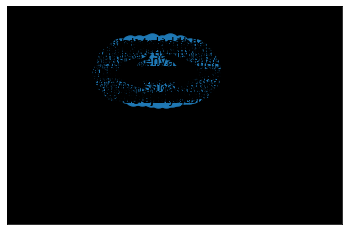

In [99]:
edge_width = [H[u][v]['weight'] for u, v in H.edges()] 
nx.draw_networkx(H,  width = edge_width)

In [ ]:
#selecting the biggest flows
bigG = country_gowalla_trips[country_gowalla_trips['user']>200]
G2 = nx.DiGraph()
edgesG2 = []
for i in range(len(bigG)):
    edgesG += [(bigG.iat[i, 0].split(',')[0], bigG.iat[i, 1].split(',')[0], bigG.iat[i, 2])]
G2.add_weighted_edges_from(edgesG2)
edge_width = [G2[u][v]['weight'] for u, v in G2.edges()] 
nx.draw_networkx(G2,  width = edge_width)